## Hw 8 - Deep learning

In [1]:
%autosave 0

Autosave disabled


In [21]:
import os
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers



#from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image


SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

Answer: binary crossentropy

In [7]:
model = models.Sequential()

model.add(layers.Input(shape=(200, 200, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [8]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.002, momentum=0.8), metrics=['acc'])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
train_dir = '../data/hair-dataset/train'
test_dir = '../data/hair-dataset/test'

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.


In [13]:
validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 201 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)


In [15]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/workspaces/machine-learning-zoomcamp/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 308ms/step - acc: 0.5644 - loss: 0.6885 - val_acc: 0.5522 - val_loss: 0.6756
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step - acc: 0.6716 - loss: 0.6183 - val_acc: 0.6318 - val_loss: 0.6195
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 339ms/step - acc: 0.6986 - loss: 0.5598 - val_acc: 0.6567 - val_loss: 0.6055
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - acc: 0.7057 - loss: 0.5667 - val_acc: 0.6418 - val_loss: 0.6015
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - acc: 0.7405 - loss: 0.5285 - val_acc: 0.6517 - val_loss: 0.6282
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - acc: 0.7392 - loss: 0.4896 - val_acc: 0.6617 - val_loss: 0.6280
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - acc: 0.7899 - loss: 0.4651 - val_acc: 0.6866 - val_loss: 0.6065
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - acc: 0.7402 - loss: 0.5032 - val_acc: 0.6816 - val_loss: 0.5864
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/st

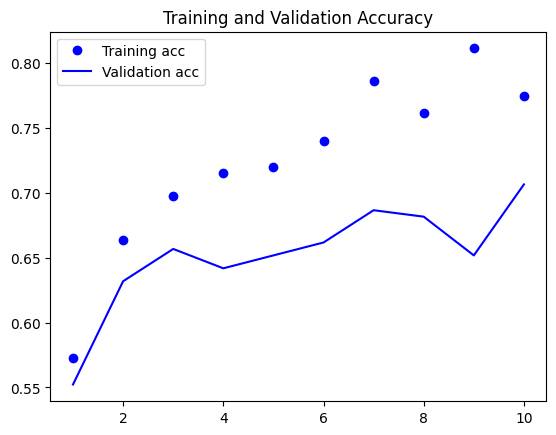

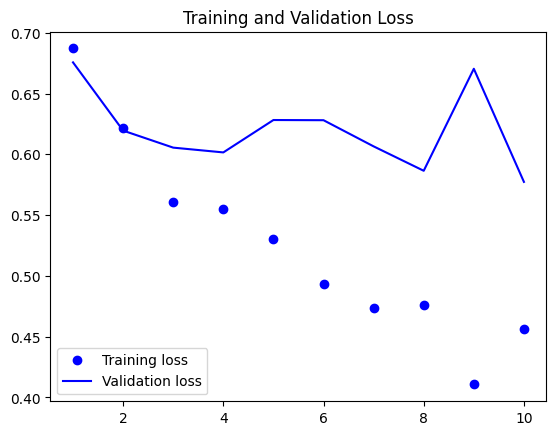

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [17]:
acc_median = np.median(acc)
acc_median

np.float64(0.7300000190734863)

In [18]:
loss_std = np.std(loss)
loss_std

np.float64(0.07851755845100929)

In [19]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    # shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

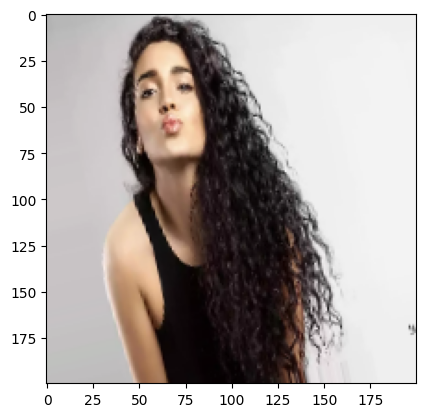

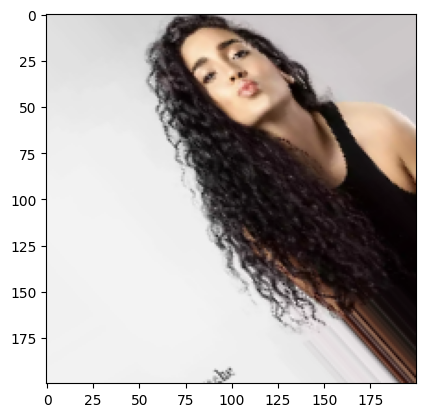

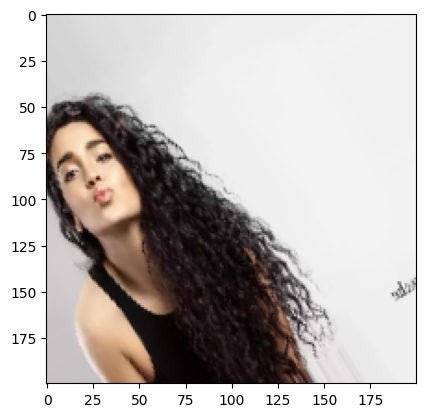

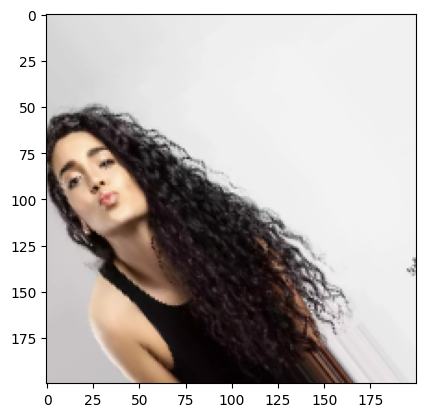

In [22]:
fnames = [os.path.join(train_dir + "/curly", fname) for
    fname in os.listdir(train_dir + "/curly")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(200, 200))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    # shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True
)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.


In [26]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 201 images belonging to 2 classes.


In [27]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/workspaces/machine-learning-zoomcamp/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 391ms/step - acc: 0.6597 - loss: 0.6166 - val_acc: 0.7015 - val_loss: 0.5833
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 307ms/step - acc: 0.6817 - loss: 0.5866 - val_acc: 0.7015 - val_loss: 0.5817
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 332ms/step - acc: 0.6751 - loss: 0.5775 - val_acc: 0.7114 - val_loss: 0.5849
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 402ms/step - acc: 0.7322 - loss: 0.5422 - val_acc: 0.7065 - val_loss: 0.6073
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 345ms/step - acc: 0.7057 - loss: 0.5629 - val_acc: 0.6965 - val_loss: 0.5614
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - acc: 0.7197 - loss: 0.5440 - val_acc: 0.6965 - val_loss: 0.6508
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 310ms/step - acc: 0.7319 - loss: 0.5447 - val_acc: 0.7413 - val_loss: 0.5353
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 304ms/step - acc: 0.7338 - loss: 0.5335 - val_acc: 0.7313 - val_loss: 0.5494
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/

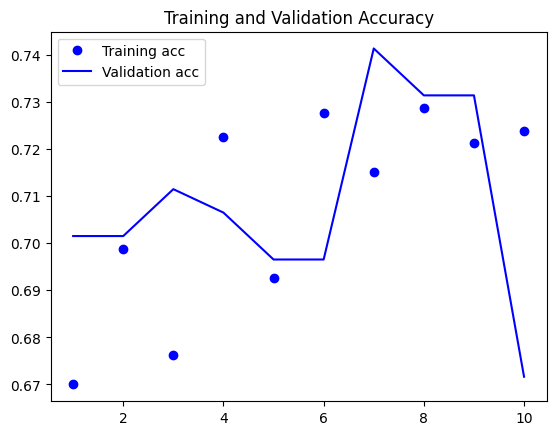

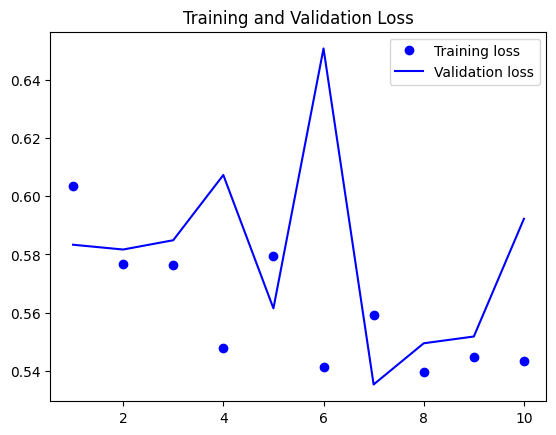

In [28]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [29]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

np.float64(0.5798072814941406)

In [30]:
val_acc_aug[5:10]

[0.6965174078941345,
 0.7412935495376587,
 0.7313432693481445,
 0.7313432693481445,
 0.6716417670249939]

In [31]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

np.float64(0.7144278526306153)